# *HealthCare Hackers*

Introduction: Hospital overcrowding remains one of the most pressing challenges facing modern healthcare systems worldwide. As patient volumes rise due to aging populations, chronic illnesses, and episodic crises like pandemics, emergency departments (EDs) increasingly operate beyond their designed capacity. This strain manifests in delayed treatments, increased patient morbidity, staff burnout, and ultimately, diminished quality of care. Among the clearest indicators of systemic pressure are prolonged wait times, missed treatment benchmarks, and capacity-driven bottlenecks—especially in emergency settings where time-sensitive decisions are the norm.

Our topic is on the accident and emergency departments in the country of England using hospital data from 2010 to 2025. The main questions we are trying to solve include if COVID-19 reduced visits for minor injuries in the type 3 department, if minor units decreased once COVID began, if 4-hour compliance is decreasing over time, and if total ED attendances significantly changed after the start of the COVID-19 pandemic. Answering these questions is very beneficial in our understanding since we want to unearth how efficiently these emergency services directly impact patient outcomes and the overall health system in England. With criteria such as 4-hour discharge compliance and 12+ hour dismissal delays, this dataset provides a threshold for identifying pressure points in hospital operations and informing resource planning across medical facilities in the country, especially during shifts to and from pandemic-era periods.

Answering these questions offers valuable insight into how emergency departments adapted—or failed to adapt—during periods of acute stress. By identifying when and where service delivery broke down, this work contributes to better resource planning, surge preparedness, and ultimately, the resilience of public healthcare in England.


**Importing the Dataset and Setting up Dataframe:**

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

from google.colab import files

df_10s = pd.read_csv('df_10s.csv')
df_20s = pd.read_csv("df_20s.csv")

Link to the dataset from the 2010s:

Link to the dataset from the 2020s:

**Data Cleansing:**

In [ ]:
# parse date in df_10s
df_10s['date'] = pd.to_datetime(df_10s['date'], errors='coerce')

# parse dates for df_20s
def parse_period(period_str):
    #we have these lines of code to check if the date string that we passed in is a string type because we do NOT
    #want to be passing in an int, float, or datetime object as the date
    #there are two types of date formats which are are given and one of them has MSitAE in the front of it. we want to get rid of MSitAE and we
    #want to convert it into a proper date form
    if isinstance(period_str, str) and "MSitAE-" in period_str:
        # remove prefix and convert to title case (e.g., 'AUGUST-2020' → 'August-2020')
        cleaned = period_str.replace("MSitAE-", "").title().strip()
        #so we have these try-except blocks to test returning a reformatted datetime
        try:
          #the %B represents the full month name, while %Y represents the year. An example of this would be March 2020
            return datetime.strptime(cleaned, "%B-%Y")
        except ValueError as e:
          #if we the datetime parsing has failed parsing we will return a passage to indicate that we failed to parse and we will return NaT which is similar to
          #NaN but for time
            print(f"Failed to parse: {cleaned}")
            return pd.NaT
    return pd.NaT

# we are going to apply this parse_period function in use
df_20s["date"] = df_20s["Period"].apply(parse_period)

# drop null values and irrelevant values since they are not relevant for our study
df_10s.drop(columns=['Unnamed: 0', 'lat', 'lon', 'month', 'year'], inplace=True, errors='ignore')

#lets drop all these irrelevant features since they are not required for our study
df_20s.drop(columns=[
    'Period', 'Org Code', 'Parent Org', 'Org name',
    'A&E attendances Booked Appointments Type 1',
    'A&E attendances Booked Appointments Type 2',
    'A&E attendances Booked Appointments Other Department',
    'Attendances over 4hrs Booked Appointments Type 1',
    'Attendances over 4hrs Booked Appointments Type 2',
    'Attendances over 4hrs Booked Appointments Other Department'
], inplace=True, errors='ignore')

#align alike cols so that it is more clear and descriptive
df_10s.rename(columns={
    'Name': 'Org name',
    'Type 1 Departments - Major A&E': 'A&E attendances Type 1',
    'Type 2 Departments - Single Specialty': 'A&E attendances Type 2',
    'Type 3 Departments - Other A&E/Minor Injury Unit': 'A&E attendances Other A&E Department',
    'Type 1 Departments - 4 hours to decision': 'Attendances over 4hrs Type 1',
    'Type 2 Departments - 4 hours to decision': 'Attendances over 4hrs Type 2',
    'Type 3 Departments - 4 hours to decision': 'Attendances over 4hrs Other Department',
    'Emergency Admissions via Type 1 A&E in 4 hours': 'Emergency admissions via A&E - Type 1',
    'Emergency Admissions via Type 2 A&E in 4 hours': 'Emergency admissions via A&E - Type 2',
    'Emergency Admissions via Type 3 and 4 A&E in 4 hours': 'Emergency admissions via A&E - Other A&E department',
    'Other Emergency admissions (i.e not via A&E)': 'Other emergency admissions',
    'Percentage in 4 hours or less (all)': 'Percentage in 4 hours or less',
    'Number of patients spending >12 hours from decision to admit to admission': 'Patients who have waited 12+ hrs from DTA to admission'
}, inplace=True)

#creating a list with common columns from both datasets without having duplicates
common_cols = list(set(df_10s.columns) & set(df_20s.columns))
#combines dataframes vertically so that it stacks the df_10 on top of the df 20 to create a singular dataframe from start to end
df = pd.concat([df_10s[common_cols], df_20s[common_cols]], ignore_index=True)

#all those slots with nulls are now replaced with the mean in order to imporve the accuracy of the data
df = df.fillna(df.mean(numeric_only=True))

#prints informaiton for each column to provide a summary of the count and to verify if all the nulls have been fixed
print("Combined dataframes:")
print(df.info())
df

Combined dataframes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38383 entries, 0 to 38382
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   date                                                    38382 non-null  datetime64[ns]
 1   Attendances over 4hrs Type 1                            38383 non-null  float64       
 2   Emergency admissions via A&E - Type 1                   38383 non-null  float64       
 3   A&E attendances Type 2                                  38383 non-null  float64       
 4   Emergency admissions via A&E - Other A&E department     38383 non-null  float64       
 5   Other emergency admissions                              38383 non-null  float64       
 6   A&E attendances Other A&E Department                    38383 non-null  float64       
 7   Attendances over 4hrs Other Departmen

,date,Attendances over 4hrs Type 1,Emergency admissions via A&E - Type 1,A&E attendances Type 2,Emergency admissions via A&E - Other A&E department,Other emergency admissions,A&E attendances Other A&E Department,Attendances over 4hrs Other Department,A&E attendances Type 1,Patients who have waited 12+ hrs from DTA to admission,Attendances over 4hrs Type 2,Emergency admissions via A&E - Type 2
0,2010-11-01,7.0,1406.0,0.0,0.0,530.0,0.0,0.0,4622.0,0.0,0.0,0.0
1,2010-11-01,65.0,892.0,0.0,0.0,568.0,0.0,0.0,3965.0,0.0,0.0,0.0
2,2010-11-01,71.0,1825.0,0.0,0.0,270.0,0.0,0.0,4541.0,0.0,0.0,0.0
3,2010-11-01,392.0,1902.0,0.0,0.0,163.0,769.0,0.0,7010.0,0.0,0.0,0.0
4,2010-11-01,0.0,0.0,0.0,0.0,0.0,4297.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
38378,2025-03-01,3371.0,1911.0,328.0,0.0,188.0,1497.0,108.0,11405.0,706.0,0.0,3.0
38379,2025-03-01,3239.0,2843.0,0.0,82.0,956.0,1240.0,81.0,8213.0,292.0,0.0,0.0
38380,2025-03-01,0.0,0.0,0.0,19.0,0.0,1479.0,8.0,0.0,0.0,0.0,0.0
38381,2025-03-01,3123.0,1883.0,0.0,0.0,57.0,6892.0,56.0,6236.0,69.0,0.0,0.0


**Hypothesis 1**: COVID-19 reduced visits for minor injuries (if Type 3) minor injury units decreased once COVID began

**Null Hypothesis (H₀)**: There is no difference in the average number of Type 3 attendances before and after March 2020.

**Alternative Hypothesis (H₁)**: Type 3 attendances significantly decreased after March 2020.

Statistical Test: Two-sample t-test


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import ttest_ind


print("\n")
print(df.columns)

# Converting data column -- just being safe here
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Splitting into pre covid and post covid sectors
## We are using March 1st as the inflection point from where COVID "starts"
pre_covid = df[df['date'] < '2020-03-01']['A&E attendances Other A&E Department']

##We are using September of 2021 as the main stopping point bc at this point
#vaccines had become widely available to all adults 18 and older for a few months now
post_covid = df[(df['date'] >= '2020-03-01') & (df['date'] < '2021-09-01')]['A&E attendances Other A&E Department']


# Two-sample t-test
t_stat, p_val = ttest_ind(pre_covid, post_covid, equal_var=False)

print("\nT-stat: %.4f" % t_stat)
print("P-value: %.4f" % p_val)



Index(['date', 'Attendances over 4hrs Type 1',
       'Emergency admissions via A&E - Type 1', 'A&E attendances Type 2',
       'Emergency admissions via A&E - Other A&E department',
       'Other emergency admissions', 'A&E attendances Other A&E Department',
       'Attendances over 4hrs Other Department', 'A&E attendances Type 1',
       'Patients who have waited 12+ hrs from DTA to admission',
       'Attendances over 4hrs Type 2',
       'Emergency admissions via A&E - Type 2'],
      dtype='object')

T-stat: 8.3336
P-value: 0.0000


Given that we have a t-test statistic of 8.3336 and a p-value of 0.0000, the result is clearly highly significant.

The t-value of 8.3336 indicates that the difference between the two groups is substantial. The positive sign here tells us that the post-COVID mean is significantly higher than the pre-COVID mean.

We can confidently reject the null hypothesis.

/tmp/ipython-input-26-150391719.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


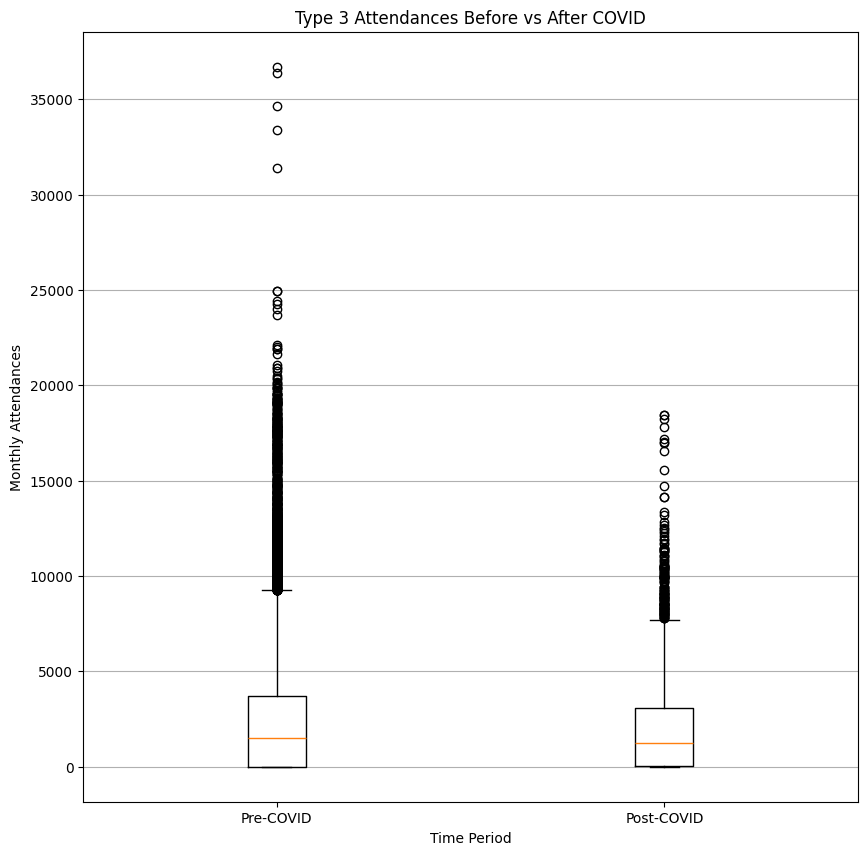

Median Pre-COVID: 1494.00
Median Post-COVID: 1221.50


In [ ]:
#DATA SORTING
data = [pre_covid, post_covid]
labels = ['Pre-COVID', 'Post-COVID']

#GRAPHING
plt.figure(figsize=(10, 10))
plt.boxplot(data, labels=labels)
plt.title('Type 3 Attendances Before vs After COVID')
plt.xlabel('Time Period')
plt.ylabel('Monthly Attendances')
plt.grid(axis='y')
plt.show()

#MEDIANS
median_pre_covid = pre_covid.median()
median_post_covid = post_covid.median()

print("Median Pre-COVID: %.2f" % median_pre_covid)
print("Median Post-COVID: %.2f" % median_post_covid)

***Information About Pre-COVID Attendances:***

The median (shown by the orange line) sits around 1494 attendances per month. The IQR is wide, and the distribution has a long right tail. In some months, attendances spike above 35,000, indicating that some hospitals were dealing with extremely high volumes.

***Information About Post-COVID Attendances:***

The median drops to 1221.5, clearly lower than the pre-COVID level. The IQR tightens considerably, signaling much less variability across hospitals.

This suggests that people were consistently avoiding hospital visits for minor injuries during COVID and that pattern held firm across most of the pandemic non vaccine period.

**Hypothesis 2**: 4-hour target compliance is decreasing over time

Key definition - the NHS target for discharging or admitting patients within 4 hours.

**Null Hypothesis (H₀)**: The average percent of patients leaving within 4 hours has not changed over time.

**Alternative Hypothesis (H₁)**: The percentage has declined.

**Statistical Test**: Linear regressiom/Time Series Analysis

Plot: Line plot of 4-hour compliance over time with regression line




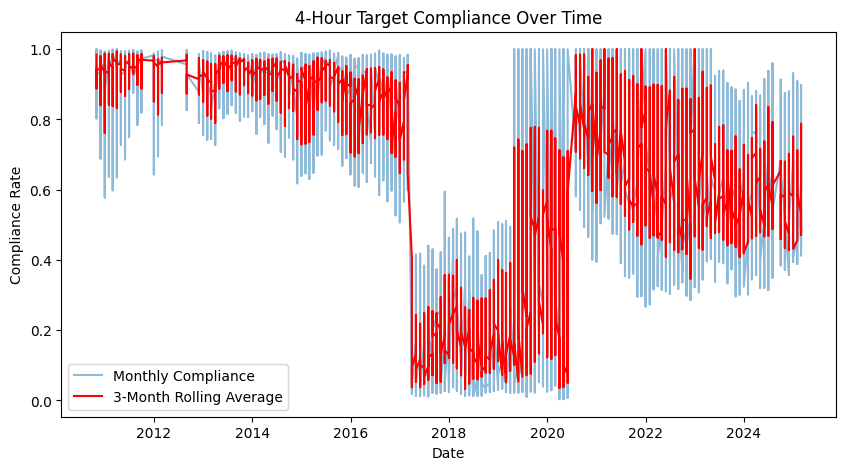

In [ ]:
import statsmodels.api as sm

#Based on the NHS definition we are defining compliance rate as the number of discharged and admitted
#pateints within 4 hrs, we are writing the expression as the 1 - the number of times
#the process took more than 4 hrs
df['compliance_rate_type1'] = 1 - (
    df['Attendances over 4hrs Type 1'] / df['A&E attendances Type 1']
)

#Ensuring we are not getting divde by 0 issues
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['compliance_rate_type1'])

df['date_ordinal'] = df['date'].map(datetime.toordinal)

df = df.sort_values('date')

# Smooth with rolling avg of 3 months
df['smoothed_complaince'] = df['compliance_rate_type1'].rolling(window=3, center=True).mean()

# Plot raw and smoothed compliance
plt.figure(figsize=(10,5))
plt.plot(df['date'], df['compliance_rate_type1'], label='Monthly Compliance', alpha=0.5)
plt.plot(df['date'], df['smoothed_complaince'], label='3-Month Rolling Average', color='red')
plt.xlabel('Date')
plt.ylabel('Compliance Rate')
plt.title('4-Hour Target Compliance Over Time')
plt.legend()
plt.show()

The time series analysis of 4-hour target compliance reveal a statistically significant long-term downward trend. This measn we can reject the null hypothesis (H₀). From 2011 to mid-2017, compliance rates were consistently high, but a sharp and sustained decline began around late 2017.

While there was a temporary spike in compliance in early 2020, coinciding with the initial phase of the COVID-19 pandemic where hospitals were probably trying to maximize turnover in order to treat the maximum amount of patients.

This improvement, however, didn't last; compliance dropped again and has remained volatile and well below pre-2017 levels.

Even when accounting for the post-pandemic fluctuation, the overall trajectory of the graph highlights a significant decline over time which supports the alternative hypothesis.

**Hypothesis 3**: Did total ED attendances significantly change after the start of COVID-19?

**Null Hypothesis (H₀)**: The average total attendances between 2010-2019 and 2020-2025 are not significantly different.

**Alternative Hypothesis (H₁)**: The average total attendances between 2010-2019 and 2020-2025 are significantly different.

**H₁(one-tailed)**: Average attendances are different between the two timeframes.

**Statistical Test:** Two-sample z-test if data is roughly normal

Plot: Histogram




Z-score: -20.62717072961449
P-value: 1.565453293756253e-94
Total Attendances per Year:
2010 7697.275409836066
2011 8185.7997407647445
2012 7698.869918699187
2013 10338.534254461716
2014 11035.448396501457
2015 12646.242406194164
2016 13105.250751653639
2017 20469.502114803625
2018 23633.4827798278
2019 26081.15664160401
2020 15712.80733944954
2021 15750.348544973545
2022 18695.421193829643
2023 19243.184657162255
2024 20945.605812220565
2025 20379.86225895317


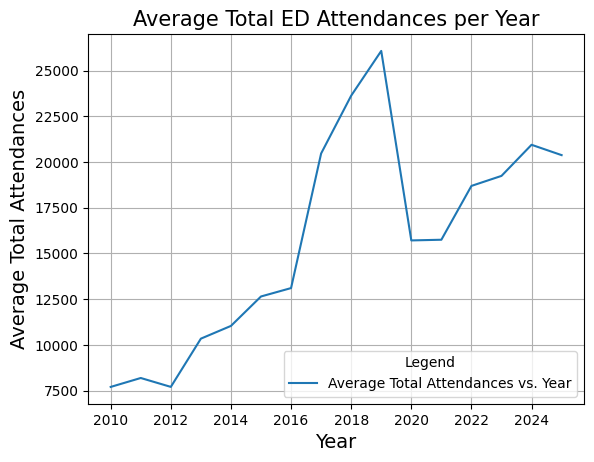

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.weightstats import ztest

#we want to create a new column within our merged df which has the aggregate number of all the attendences because we want to use
#this as a measure to compare pre_covid vs post_covid ED aggregate attendences
df['total attendances'] = df['A&E attendances Type 1'] + df['Attendances over 4hrs Type 1'] + df['A&E attendances Other A&E Department'] + df['Attendances over 4hrs Type 2'] + df['Attendances over 4hrs Other Department']
#we want to get a column for year which we extract from the date column in order to classify pre_covid vs post_covid attendences,
#where pre_covid is before 2020 and post_covid is 2020 and after
df['year'] = df['date'].dt.year
pre_covid_attendances = df[df['year'] < 2020]['total attendances']
post_covid_attendances = df[df['year'] >= 2020]['total attendances']

#calling function do two sample z test to determine if there is a significant change from pre to post covid attendences
z_stat, p_val = ztest(pre_covid_attendances, post_covid_attendances, alternative='two-sided')
print(f"\nZ-score: {z_stat}")
print(f"P-value: {p_val}")

#mean() calculates mean of the attendences per year, reset_index() resets index of dataframe and uses default one
#we want to create separate dataframes and calculate the mean of the attendences for each specific year
year_mean = df.groupby('year')['total attendances'].mean().reset_index()

#iterating through each of the dataframes grouped by year to print information for the year and attendeces per year
print("Total Attendances per Year:")
for i, row in year_mean.iterrows():
  print(int(row['year']),row['total attendances'])


#lineplot is a seaborn function which helps capture the trend of the total attednences per year via a line graph
sns.lineplot(data=year_mean, x='year', y='total attendances', label = 'Average Total Attendances vs. Year')

#developing the titles, axes, and legends for the graph to show what we are trying to measure
plt.title('Average Total ED Attendances per Year', fontsize=15)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Average Total Attendances', fontsize = 14)
plt.grid(True)
plt.legend(title='Legend', loc='lower right')

#displaying the graph
plt.show()

After performing a hypothesis test, we were able to deduce that the z test statistic was -20.62717072961445 and the p value was approximately 0 indicating that there suggests evidence in average total attendances before 2020 and 2020 & after are significantly different.

The main characteristics in my dataset inlcude the year, total attendance numbers, the number of admissions and attendances per department type(before and after 4hrs), as well as the number of patients waiting for admission.


There are a total of 12 features in the dataset. There doesn't seem to be a feature which is over-represented.

When data collection started in 2010, there weren't many average attendees, but slowly overtime, it rose to a peak at about 27000 in 2019 and then there is a sudden drop in average attendees around 2020. In the midst of 2020, it rose indicating the spread of the virus was increasing the number of attendees slowly but surely. It grew for another couple of years before almost plateuing around 2023 but then it slowly grew again and dipped in mid 2023-2025.

# ML ANALYSIS
Developed a regression model using *Ordinary Least Squares (OLS)* to analyze and forecast monthly Type 3 A&E attendances (lower acuity, non-life-threatening visits that do not require full emergency resources).

The model includes **time trends**, a **COVID-era indicator**, and an **interaction term** to capture trend changes post-COVID.


# ML INTERPRETATION

*   Significant drop in Type 3 attendances at the onset of COVID
*   Positive interaction slope suggests that attendances recover post-COVID
*   Residual analysis shows no pattern, supporting model assumptions
*   Forecasts are lower than pre-COVID trend, but shows stabilization
*   R² is relatively low, indicating that while the model captures broad shifts, many factors affecting variability are unexplained



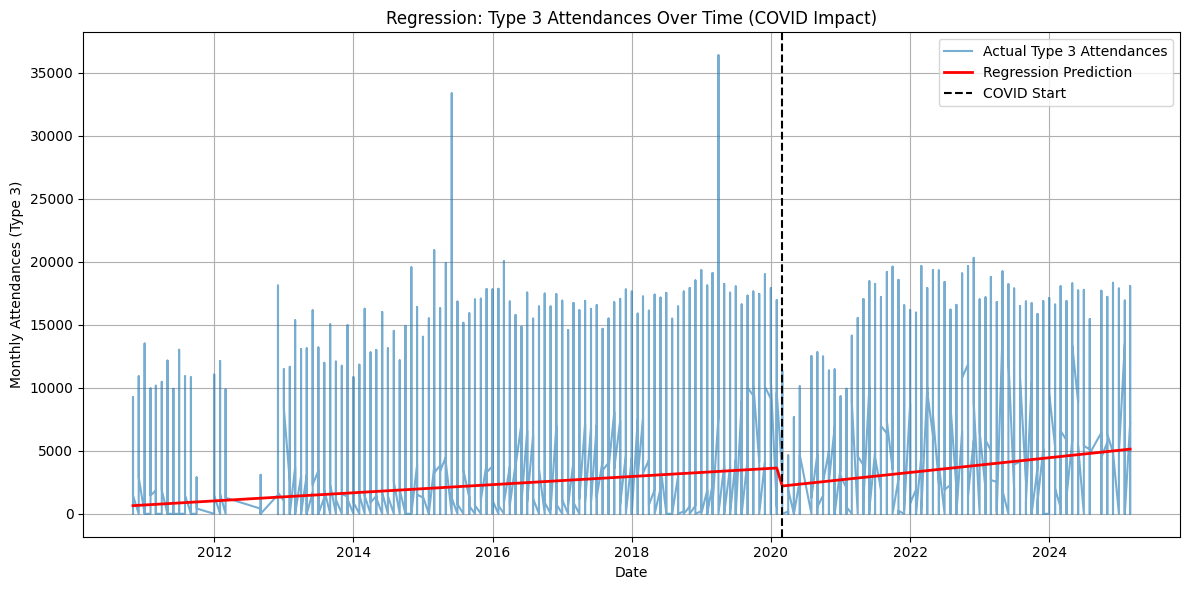

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import r2_score, mean_squared_error

#flag months after march 1 2020 as covid-era (0 = pre, 1 = post)
df['covid_flag'] = (df['date'] >= '2020-03-01').astype(int)
#use ordinal for continuous numeric time indices
df['time_index'] = df['date'].map(datetime.toordinal)
df['interaction'] = df['covid_flag'] * df['time_index']

#define model independent vars
X = sm.add_constant(df[['time_index', 'covid_flag', 'interaction']])
y = df['A&E attendances Other A&E Department']

# fit linear regression model
model = sm.OLS(y, X).fit()
df['predicted'] = model.predict(X)

# plot actual vs predicted attendances
plt.figure(figsize=(12, 6))
plt.plot(df['date'], y, label='Actual Type 3 Attendances', alpha=0.6)
plt.plot(df['date'], df['predicted'], label='Regression Prediction', color='red', linewidth=2)
plt.axvline(pd.to_datetime('2020-03-01'), color='black', linestyle='--', label='COVID Start')
plt.xlabel('Date')
plt.ylabel('Monthly Attendances (Type 3)')
plt.title('Regression: Type 3 Attendances Over Time (COVID Impact)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



---



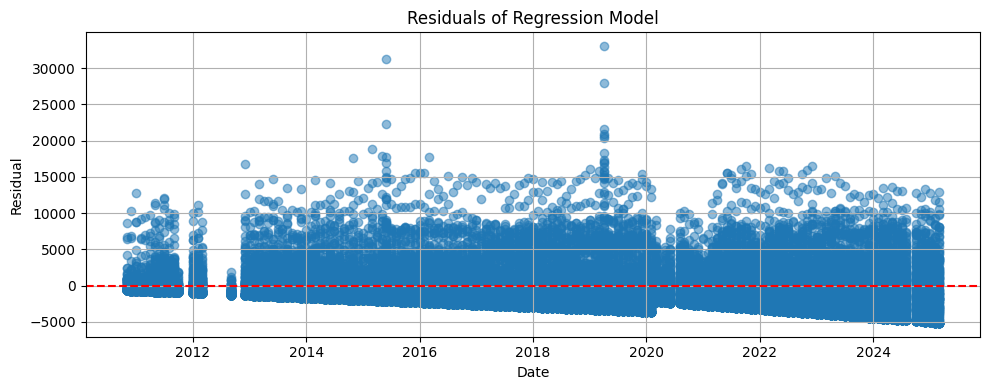

In [ ]:
#compute and plot residuals to evaluate model fit
residuals = y - df['predicted']

plt.figure(figsize=(10, 4))
plt.scatter(df['date'], residuals, alpha=0.5)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals of Regression Model')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)
plt.tight_layout()
plt.show()



---



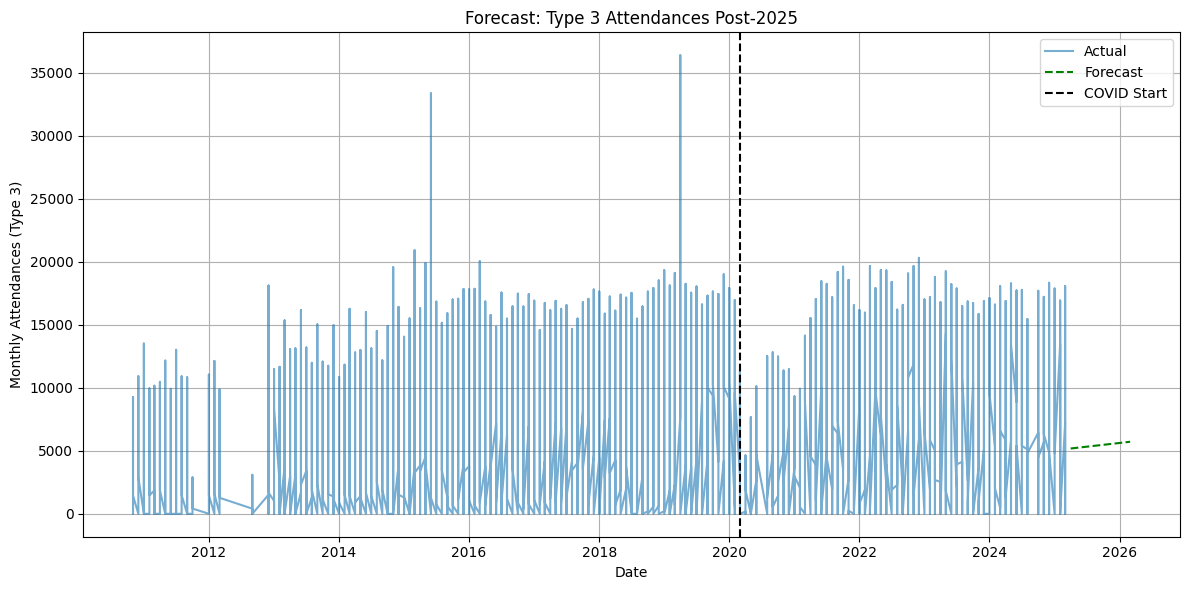

,Value
Time Slope (Pre-COVID),8.841001e-01
COVID Level Shift,-5.314724e+05
Slope Change (Post-COVID),7.186841e-01
R²,1.006459e-01
MSE,1.081125e+07


In [ ]:
# computer R^2 to determine how well model handle variance
r2 = r2_score(y, df['predicted'])

#compute MSE to measure average prediction error
mse = mean_squared_error(y, df['predicted'])

#generate future dates & df
future_dates = pd.date_range(start=df['date'].max() + pd.DateOffset(months=1), periods=12, freq='MS')
future_df = pd.DataFrame({'date': future_dates})
future_df['time_index'] = future_df['date'].map(datetime.toordinal)
future_df['covid_flag'] = 1
future_df['interaction'] = future_df['time_index'] * future_df['covid_flag']
future_df['const'] = 1.0

#predict future values for our features
X_future = future_df[['const', 'time_index', 'covid_flag', 'interaction']]
future_df['prediction'] = model.predict(X_future)

#plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['date'], y, label='Actual', alpha=0.6)
plt.plot(future_df['date'], future_df['prediction'], label='Forecast', linestyle='--', color='green')
plt.axvline(pd.to_datetime('2020-03-01'), color='black', linestyle='--', label='COVID Start')
plt.xlabel('Date')
plt.ylabel('Monthly Attendances (Type 3)')
plt.title('Forecast: Type 3 Attendances Post-2025')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#prints summary statistics for the data
summary_dict = {
    'Time Slope (Pre-COVID)': model.params['time_index'],
    'COVID Level Shift': model.params['covid_flag'],
    'Slope Change (Post-COVID)': model.params['interaction'],
    'R²': model.rsquared,
    'MSE': mse
}

import pandas as pd
summary_df = pd.DataFrame.from_dict(summary_dict, orient='index', columns=['Value'])
summary_df